In [10]:
from os.path import join, basename, splitext
from glob import glob
from matplotlib import rcParams
import pandas as pd
import pickle
import numpy as np
import seaborn as sns

from deep_aqi import ROOT

pd.set_option('expand_frame_repr', False)

In [11]:
def clean_outliers(data, sigma=10):
    # according to chebyshev inequality 10sigma covers 99% percent of data despite the distribution
    top = data[target_column].mean() + sigma * data[target_column].std()
    return data.loc[data[target_column] < top]

In [12]:
PROCESSED_DATA = join(ROOT, 'data', 'processed')

# Looking for hourly/daily/monthly patterns in target with and without outliers (data_source and clean_source)

In [80]:
file_path = join(PROCESSED_DATA, '88101.parquet') # PM2.5 FRM/FEM Mass
# file_path = join(PROCESSED_DATA, '88502.parquet') # PM2.5 non FRM/FEM Mass
# file_path = join(PROCESSED_DATA, '81102.parquet') # PM10 Mass
# file_path = join(PROCESSED_DATA, '44201.parquet') # Ozone
# file_path = join(PROCESSED_DATA, '42401.parquet') # SO2
# file_path = join(PROCESSED_DATA, '42101.parquet') # CO
# file_path = join(PROCESSED_DATA, '42602.parquet') # NO2


data_source = pd.read_parquet(file_path)
target_column = data_source.columns[-1]

In [81]:
clean_source = clean_outliers(data_source)
print(f'clean_source has {len(data_source) - len(clean_source)} less observations, out of {len(data_source)}')
print(f'There are: {data_source.SiteCode.nunique()} sites in dataset.')

clean_source has 560 less observations, out of 1283694
There are: 49 sites in dataset.


In [82]:
data_source.columns

Index(['SiteCode', 'LocalDate', 'WindDir', 'WindSpeed', 'Temperature',
       'Pressure', 'RelHum', 'PM2.5 - Local Conditions'],
      dtype='object')

In [83]:
# year = 2017
# data_source = data_source.loc[data_source.LocalDate.dt.year == year, :]
# clean_source = clean_source.loc[clean_source.LocalDate.dt.year == year, :]

# temp = data_source.groupby(by=data_source.LocalDate.dt.date).mean()

In [84]:
# rcParams["figure.figsize"] = (24, 4)
# sns.lineplot(x=temp.index, y=temp[target_column])

In [85]:
# temp = data_source.groupby(by=data_source.LocalDate.dt.date).mean()

# rcParams["figure.figsize"] = (24, 4)
# sns.lineplot(x=temp.index, y=temp[target_column])

In [86]:
# sns.lineplot(x=temp.index, y=temp['WindSpeed'])

In [87]:
# sns.lineplot(x=temp.index, y=temp['WindDir'])

In [88]:
# sns.lineplot(x=temp.index, y=temp['Temperature'])

In [89]:
# sns.lineplot(x=temp.index, y=temp['Pressure'])

In [90]:
# sns.lineplot(x=temp.index, y=temp['RelHum'])

## Correlation analysis

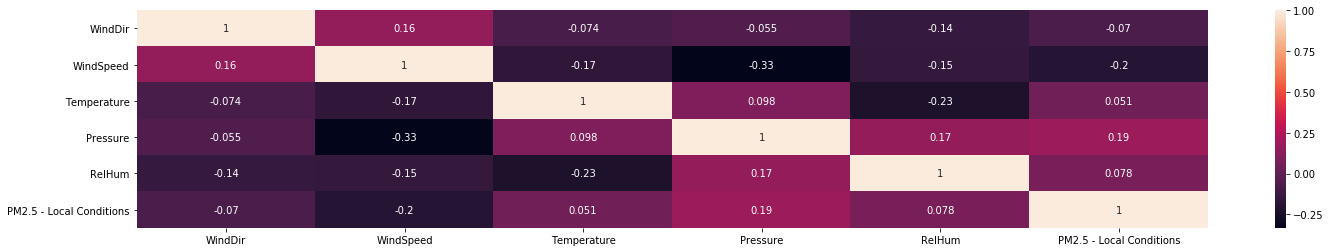

In [91]:
rcParams["figure.figsize"] = (24, 4)
sns.heatmap(clean_source.corr('pearson'),
           annot=True)

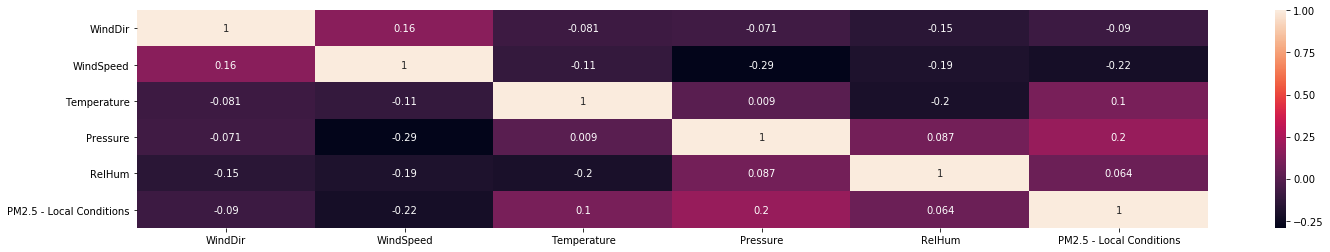

In [92]:
rcParams["figure.figsize"] = (24, 4)
sns.heatmap(clean_source.corr('spearman'),
           annot=True)

### Where is spearman correlation higher than pearson correlation

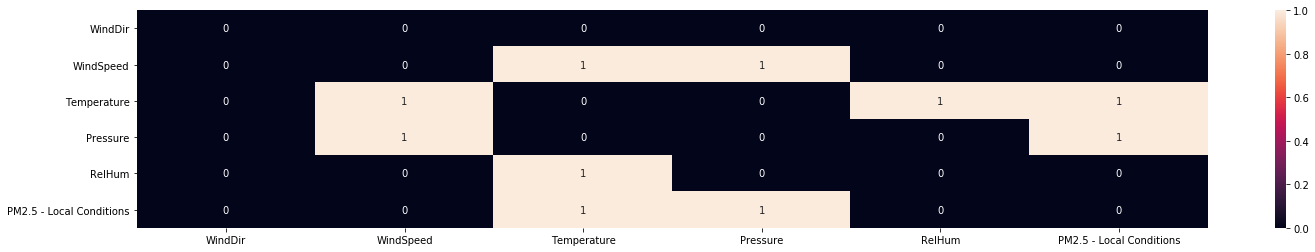

In [93]:
rcParams["figure.figsize"] = (24, 4)
sns.heatmap(clean_source.corr('spearman') > clean_source.corr('pearson'),
           annot=True)